In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.arima.model import ARIMA
import numpy as np


In [79]:
#load data
df=pd.read_csv("airline_passengers.csv")

In [80]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [81]:
df["Month"]=pd.to_datetime(df["Month"])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [83]:
df['month'] = df['Month'].dt.month
df.head()

,Month,Thousands of Passengers,month
0,1949-01-01,112,1
1,1949-02-01,118,2
2,1949-03-01,132,3
3,1949-04-01,129,4
4,1949-05-01,121,5


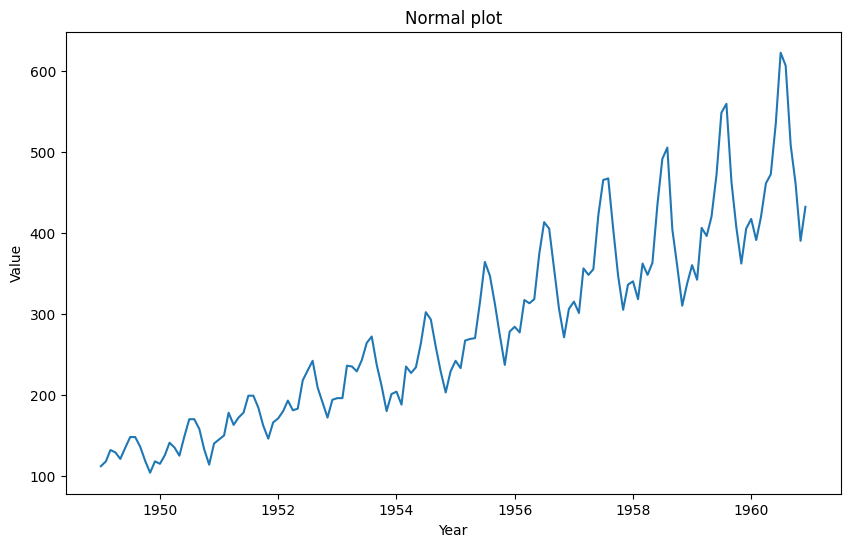

In [84]:


plt.figure(figsize=(10,6))
plt.plot(df["Month"],df["Thousands of Passengers"],label="Actual value")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Normal plot")
plt.show()


In [ ]:
# check further for seasonality and trend
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.Month,period = 12)
fig = decomposition.plot()
plt.show()

In [9]:


df["Differenced"] = df["Thousands of Passengers"].diff(periods = 2)
df = df.dropna()
df.to_csv("diff_df.csv",index = False)


In [10]:


adf_result = adfuller(df['Differenced'])
print(f"ADF Statistic (differenced) : {adf_result[0]}")
print(f"p-value (differenced) : {adf_result[1]}")

ADF Statistic (differenced) : -2.9616951355554244
p-value (differenced) : 0.03862975767698839


In [11]:
# H0: Data is not stationary
if adf_result[1] < 0.05:
    print(" we reject the null hypothysis - this suggest that the data meiught be stationaray")
else:
    print(" we fail to reject null hypothysis - this indicates that the data is likely non stationaray might require further transformation")

 we reject the null hypothysis - this suggest that the data meiught be stationaray


In [12]:

#train test split 70% training 30%testing data
split_ratio=0.7
train_size=int(len(df)*split_ratio)
train_data,test_data=df[0:train_size],df[train_size:].copy()


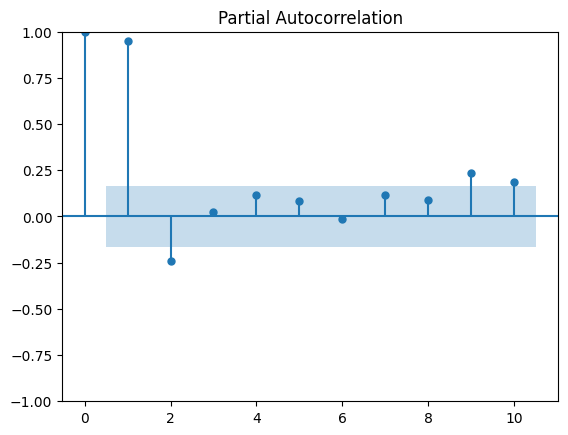

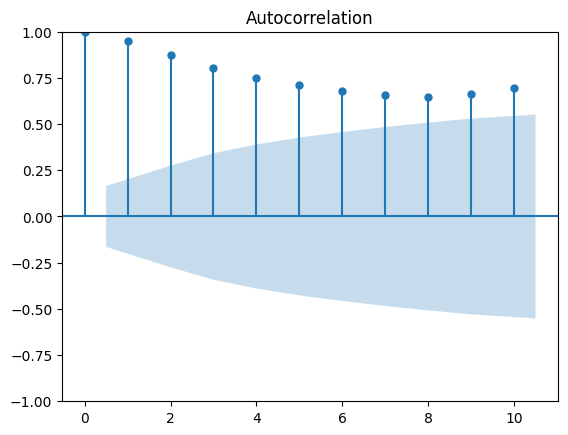

In [13]:
#draw acf pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#find 'p' for arima and sarimax
plot_pacf(df["Thousands of Passengers"].dropna(),lags=10)
plt.show()

#find "q" for arima and sarimax
plot_acf(df["Thousands of Passengers"].dropna(),lags=10)
plt.show()

In [14]:

model=ARIMA(train_data['Thousands of Passengers'],order=(1,2,3))
model_fit=model.fit()

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [15]:
#forecast on testing data
forecast=model_fit.forecast(steps=len(test_data))

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
# Add forecast column to the original test DataFrame
test_data.loc[:,'Forecast']=forecast

In [17]:
#print actual and predicted values for testing data 
selected_columns=['Month','Thousands of Passengers','month',"Forecast"]
print(test_data[selected_columns].head())
print(test_data[selected_columns].tail())
print(test_data.head())

         Month  Thousands of Passengers  month    Forecast
101 1957-06-01                      422      6  372.221897
102 1957-07-01                      465      7  371.176051
103 1957-08-01                      467      8  375.993151
104 1957-09-01                      404      9  376.701419
105 1957-10-01                      347     10  380.289212
         Month  Thousands of Passengers  month    Forecast
139 1960-08-01                      606      8  461.444385
140 1960-09-01                      508      9  463.845676
141 1960-10-01                      461     10  466.246975
142 1960-11-01                      390     11         NaN
143 1960-12-01                      432     12         NaN
         Month  Thousands of Passengers  month  Differenced    Forecast
101 1957-06-01                      422      6         74.0  372.221897
102 1957-07-01                      465      7        110.0  371.176051
103 1957-08-01                      467      8         45.0  375.993151
104 

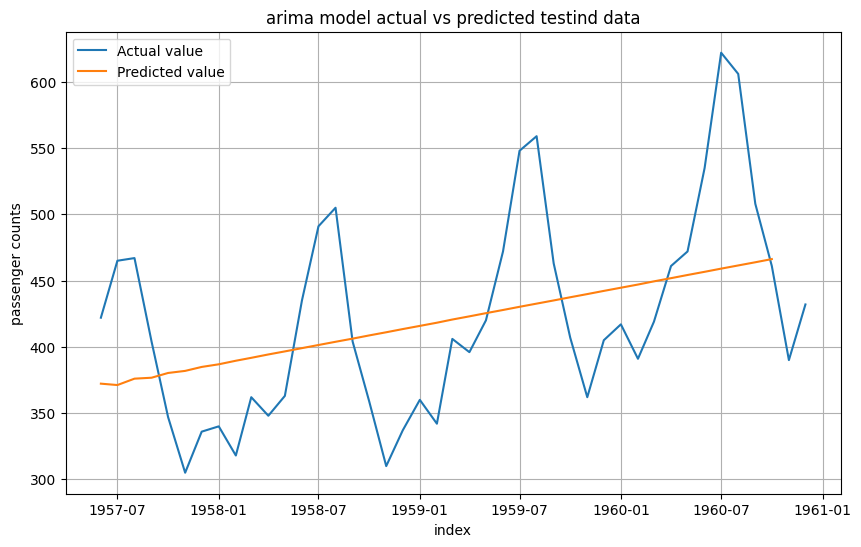

In [18]:
# Plot actual vs. predicted values on testing data

plt.figure(figsize=(10,6))
plt.plot(test_data.Month,test_data["Thousands of Passengers"],label="Actual value")
plt.plot(test_data.Month,test_data["Forecast"],label="Predicted value")
plt.xlabel("index")
plt.ylabel("passenger counts")
plt.title("arima model actual vs predicted testind data")
plt.legend()
plt.grid(True)
plt.show()

In [19]:
#forecast for the next 10 years
model=ARIMA(df["Thousands of Passengers"],order=(1,2,3))
model_fit=model.fit()


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [20]:
num_periods=10
forecast=model_fit.forecast(steps=num_periods)
print(df.tail())

         Month  Thousands of Passengers  month  Differenced
139 1960-08-01                      606      8         71.0
140 1960-09-01                      508      9       -114.0
141 1960-10-01                      461     10       -145.0
142 1960-11-01                      390     11       -118.0
143 1960-12-01                      432     12        -29.0


C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [21]:
df.head()

df.set_index('Month', inplace=True)


In [22]:
# Create a DataFrame for the forecasted data (assuming 'Date' is the index)
start_date = df.index[-1] + pd.DateOffset(months=1)  # Start from the last date in df, add 1 month
predicted_dates = pd.date_range(start=start_date, periods=num_periods, freq='Y')  # Use 'M' for monthly frequency
forecast_df = pd.DataFrame({'Month': predicted_dates, 'Forecast': forecast})


C:\Users\dbda\AppData\Local\Temp\ipykernel_13272\2829647153.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  predicted_dates = pd.date_range(start=start_date, periods=num_periods, freq='Y')  # Use 'M' for monthly frequency


In [23]:
# Print the forecasted data 
print(forecast_df.head()) 
print(forecast_df.tail()) 


         Month    Forecast
142 1961-12-31  476.384956
143 1962-12-31  464.301249
144 1963-12-31  476.509471
145 1964-12-31  472.238925
146 1965-12-31  479.146981
         Month    Forecast
147 1966-12-31  478.471877
148 1967-12-31  482.940915
149 1968-12-31  483.920353
150 1969-12-31  487.267009
151 1970-12-31  489.007830


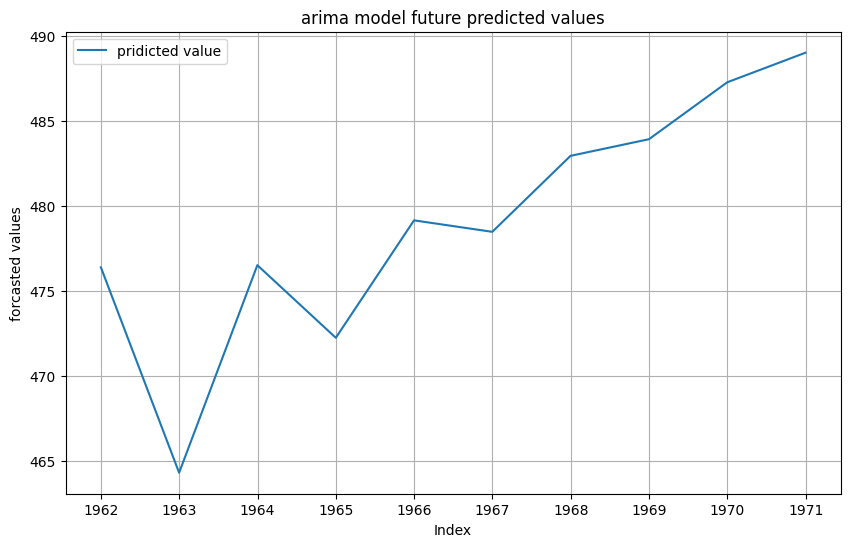

In [24]:
# Now plot future predictions
plt.figure(figsize=(10,6))
plt.plot(forecast_df.Month,forecast_df["Forecast"],label="pridicted value")
plt.xlabel("Index")
plt.ylabel("forcasted values")
plt.title("arima model future predicted values")
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# add sarimax
# Create a copy of the test DF - Will be used for SARIMAX
arima_sarimax_df=test_data.copy()
test_data

,Thousands of Passengers,month,Differenced,Forecast_sarimax
Month,,,,
1957-10-01,347,10,-120.0,-108.233234
1957-11-01,305,11,-99.0,-86.237891
1957-12-01,336,12,-11.0,-1.137158
1958-01-01,340,1,35.0,48.229083
1958-02-01,318,2,-18.0,-7.621364
1958-03-01,362,3,22.0,39.469020
1958-04-01,348,4,30.0,53.032919
1958-05-01,363,5,1.0,3.754003
1958-06-01,435,6,87.0,75.758359


In [69]:
#create a new column with 12 month difference
df["Differenced"]=df["Thousands of Passengers"].diff(periods=2)

C:\Users\dbda\AppData\Local\Temp\ipykernel_13272\2661325884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Differenced"]=df["Thousands of Passengers"].diff(periods=2)


In [70]:
#check stationaruty of the differenced series (ADF test)
df=df.dropna()
df.to_csv("diff_df2.csv",index=False)

In [71]:

adf_result=adfuller(df["Differenced"])
print(f"statistic (differenced): {adf_result[0]}")
print(f'p-value (differenced): {adf_result[1]}')

statistic (differenced): -2.714105886701526
p-value (differenced): 0.07162898026664132


In [72]:
# H0: Data is not stationary
if adf_result[1] < 0.05:
    print("We reject the null hypothesis - This suggests that the data might be stationary.")
else:
    print("We fail reject the null hypothesis - This indicates that the data is likely non-stationary and might require further transformations (e.g., differencing) before using some time series analysis methods.")


We fail reject the null hypothesis - This indicates that the data is likely non-stationary and might require further transformations (e.g., differencing) before using some time series analysis methods.


In [73]:
# Train-Test Split (70% training, 30% testing)
split_ratio=0.7
train_size=int(len(df)*split_ratio)
train_data,test_data=df[0:train_size],df[train_size:].copy()


In [74]:
# SARIMA model on training data (replace p, d, q with identified values)
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train_data["Differenced"],order=(1,2,3),seasonal_order=(1,2,3,12))
model_fit = model.fit()

C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\dbda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('T

In [75]:
#forecast on testing data
#forecast_sarimax=model_fit.forecast(steps=len(test_data))
forecast_sarimax = model_fit.forecast(steps=len(df))

In [76]:
#add forecast column to the original test dataframe
test_data.loc[:,"Forecast_sarimax"]=forecast_sarimax
arima_sarimax_df.loc[:,"Forecast_sarimax"]=forecast_sarimax
print("***SARIMAX******")
print(arima_sarimax_df.head())
print(arima_sarimax_df.tail())
arima_sarimax_df

***SARIMAX******
            Thousands of Passengers  month  Differenced  Forecast_sarimax
Month                                                                    
1957-10-01                      347     10       -120.0               NaN
1957-11-01                      305     11        -99.0        -94.740288
1957-12-01                      336     12        -11.0         -0.809535
1958-01-01                      340      1         35.0         45.627766
1958-02-01                      318      2        -18.0         -9.310491
            Thousands of Passengers  month  Differenced  Forecast_sarimax
Month                                                                    
1960-08-01                      606      8         71.0         30.561448
1960-09-01                      508      9       -114.0       -106.880965
1960-10-01                      461     10       -145.0       -175.100274
1960-11-01                      390     11       -118.0       -142.514970
1960-12-01           

,Thousands of Passengers,month,Differenced,Forecast_sarimax
Month,,,,
1957-10-01,347,10,-120.0,NaN
1957-11-01,305,11,-99.0,-94.740288
1957-12-01,336,12,-11.0,-0.809535
1958-01-01,340,1,35.0,45.627766
1958-02-01,318,2,-18.0,-9.310491
1958-03-01,362,3,22.0,37.938992
1958-04-01,348,4,30.0,50.048378
1958-05-01,363,5,1.0,-0.944839
1958-06-01,435,6,87.0,74.112779


KeyError: 'Forecast'

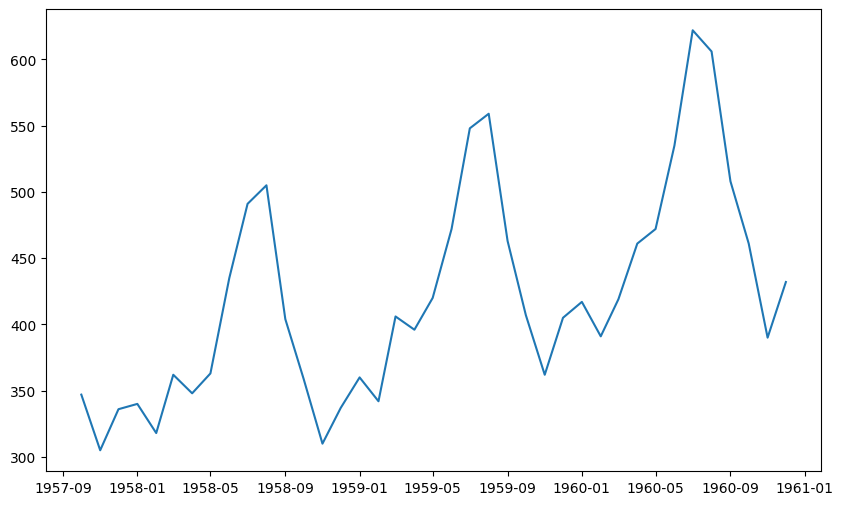

In [77]:
# Plot actual vs. predicted values on testing data
plt.figure(figsize=(10, 6))
plt.plot(arima_sarimax_df.index, arima_sarimax_df['Thousands of Passengers'], label='Actual Value')
plt.plot(arima_sarimax_df.index, arima_sarimax_df['Forecast'], label='Predicted Value - ARIMA')
plt.plot(arima_sarimax_df.index,arima_sarimax_df['Forecast_sarimax'], label='Predicted Value - SARIMAX')
plt.xlabel('Index')
plt.ylabel('thousands of passengers')
plt.title('ARIMA and SARIMAX - Actual vs. Predicted (Testing Data)')
plt.legend()
plt.grid(True)
plt.show()
